In [188]:
# pandas and numpy
import pandas as pd
import numpy as np

#xgboost as separate library
import xgboost as xgb

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [189]:
# loading data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [190]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [191]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [192]:
# remvoing white spaces (as we are printing the DT ast the end)
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [193]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [194]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        continue # ignore other than strings
    values =  df[i].unique()
    #print(i, values)
    for x in values:
        if len(x.split(' ')) != 1: # if spce is there it splits into minimum two elements.
            if i != 'TotalCharges': # this is float but usind as object.
                df[i].replace(' ', '_', regex=True, inplace=True)
            break

In [195]:
df['MultipleLines'].unique()

array(['No_phone_service', 'No', 'Yes'], dtype=object)

In [196]:
df.columns = df.columns.str.replace(' ', '_')

In [197]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [198]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [199]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [200]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [201]:
# TotalCharges column has numbers, but type is object
try:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
except ValueError as e:
    print('some error - ', e)

some error -  Unable to parse string " " at position 488


In [202]:
df['TotalCharges'][488]

' '

In [203]:
df['TotalCharges'][485:492]  # one entry has issue

485    6130.85
486       1415
487    6201.95
488           
489      74.35
490    6597.25
491     114.15
Name: TotalCharges, dtype: object

In [204]:
len(df.loc[df['TotalCharges'] == ' '])

11

In [205]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,...,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,...,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,,No


In [206]:
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges'] = 0

In [207]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [208]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [209]:
df.loc[df['MonthlyCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [210]:
### XGB allows onlt int, float, boolean data types in the features.

In [211]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [212]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [213]:
df.replace(' ', '_', regex=True, inplace=True)

In [214]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [215]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [216]:
## CustomerID dont have much significance, dropping the column
## Churn is label columns, dropping that and using it in y

In [217]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [218]:
X = df.drop(['customerID', 'Churn'], axis=1).copy()

In [219]:
y = df['Churn'].copy()

In [220]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [221]:
# convert Yes,No values to 1, 0
y_with_yes_index = (y == 'Yes')
y[y_with_yes_index] = 1

y_with_no_index = (y == 'No')
y[y_with_no_index] = 0

In [222]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [223]:
y.columns = ['Churn']

In [224]:
## covert the 'y' data types to numeric ( otherwise, plotting confusion matric will give problems)

In [225]:
y = pd.to_numeric(y)
y.dtypes

dtype('int64')

In [226]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [227]:
### One-hot encoding for Categorical variables

In [228]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [229]:
categorical_cols = ['gender',
                    'SeniorCitizen',
                    'Partner',
                    'Dependents',
                    'PhoneService',
                    'MultipleLines',
                    'InternetService', 
                    'OnlineSecurity',  
                    'OnlineBackup',   
                    'DeviceProtection',
                    'TechSupport',    
                    'StreamingTV',    
                    'StreamingMovies',
                    'Contract',    
                    'PaperlessBilling',
                    'PaymentMethod']

In [230]:
X_encoded = pd.get_dummies(X, columns=categorical_cols)

In [231]:
len(X.columns), X.columns

(19,
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges'],
       dtype='object'))

In [232]:
len(X_encoded.columns), X_encoded.columns

(46,
 Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
        'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
        'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
        'PhoneService_Yes', 'MultipleLines_No',
        'MultipleLines_No_phone_service', 'MultipleLines_Yes',
        'InternetService_DSL', 'InternetService_Fiber_optic',
        'InternetService_No', 'OnlineSecurity_No',
        'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
        'OnlineBackup_No', 'OnlineBackup_No_internet_service',
        'OnlineBackup_Yes', 'DeviceProtection_No',
        'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
        'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
        'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
        'StreamingMovies_No', 'StreamingMovies_No_internet_service',
        'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract

In [233]:
### Check if data is balanced

In [234]:
sum(y) / len(y) * 100

26.536987079369588

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [236]:
## using startify, we can get same balance of data in test and train data

In [237]:
sum(y_train) / len(y_train) * 100

26.54297614539947

In [238]:
sum(y_test) / len(y_test) * 100

26.519023282226005

In [239]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)

In [240]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.63160
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680
[11]	validation_0-aucpr:0.63828
Stopping. Best iteration:
[1]	validation_0-aucpr:0.64538



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [241]:
y_test

5909    0
3670    0
6220    0
5905    0
6435    0
       ..
476     0
1607    1
6808    0
2962    1
3955    0
Name: Churn, Length: 1761, dtype: int64

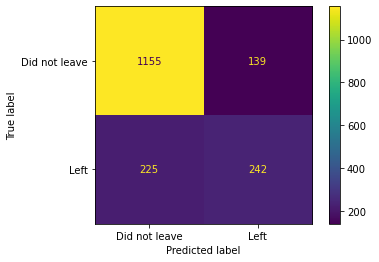

In [242]:
dummy=plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave', 'Left'])

In [243]:
# accuracy
print('Predicted Did Not leave - %.2f %%' % ((float(1155) / (1155 + 139)) * 100))
print('Predicted Left - %.2f %%' % ((float(242) / (225 + 242)) * 100 ))

Predicted Did Not leave - 89.26 %
Predicted Left - 51.82 %


In [244]:
clf_xgb.score(X_test, y_test) * 100

79.32992617830777

In [245]:
# the 'customer left' prediction is not really great, this could be due to the 'y' values are imbalanced.
# XGBoost hyper parameter 'scale_pos_weight' can help with working with misbalanced data.
# Also use other hyper parameters related to Tree classfiers
# max_depth - depth of the tree
# learning_rate - for gradient
# gamma -
# lambda - regularization

In [246]:
%%time

# performing cross validation

param_grid = None

def run_cross_validation(params=param_grid):
    optimal_params = GridSearchCV(
        estimator=xgb.XGBClassifier(objective='binary:logistic',
                                    seed=42,
                                    subsample=0.9,
                                    colsample_bytree=0.5),
        param_grid=param_grid,
        scoring='roc_auc', # recommended when the response variable data is imbalanced.
        verbose=0,
        n_jobs=10,
        cv=3)

    optimal_params.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=False)

    print(optimal_params.best_params_)
    return optimal_params

Wall time: 0 ns


In [247]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

optimal_params = run_cross_validation(params=param_grid)

{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


In [248]:
# run cv again with little dif
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [0.05, 0.1, 0.5],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [10, 20, 100],
    'scale_pos_weight': [3]
}
optimal_params = run_cross_validation(param_grid)

{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 3}


In [249]:
# build the XGBoost with the new parameters
clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=1.0,
                           learn_rate=0.05,
                           max_depth=3,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9, # use 90% of the data
                           colsample_bytree=0.5) # use 50% of the feature data.
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[16:45:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.57364
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.60033
[2]	validation_0-aucpr:0.60597
[3]	validation_0-aucpr:0.61083
[4]	validation_0-aucpr:0.61312
[5]	validation_0-aucpr:0.61229
[6]	validation_0-aucpr:0.62419
[7]	validation_0-aucpr:0.61634
[8]	validation_0-aucpr:0.62306
[9]	validation_0-aucpr:0.64752
[10]	validation_0-aucpr:0.64860
[11]	validation_0-aucpr:0.64876
[12]	validation_0-aucpr:0.64914
[13]	validation_0-aucpr:0.64807
[14]	validation_0-aucpr:0.64669
[15]	validation_0-aucpr:0.64822
[16]	validation_0-aucpr:0.64694
[17]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.05, learning_rate=0.300000012, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

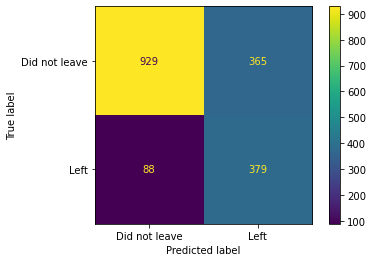

In [250]:
dummy=plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave', 'Left'])

In [251]:
# accuracy
print('Predicted Did Not leave - %.2f %%' % ((float(929) / (929 + 365)) * 100))
print('Predicted Left - %.2f %%' % ((float(379) / (379 + 88)) * 100 ))

Predicted Did Not leave - 71.79 %
Predicted Left - 81.16 %


In [252]:
clf_xgb.score(X_test, y_test) * 100

74.27597955706985